# 0. Table of content:

[1. Import and data load:](#1.-Import-and-data-load:)  
[2. Predictors check:](#2.-Predictors-check:)  
&nbsp;&nbsp;&nbsp;&nbsp;- [2.1. General:](#2.1.-General:)  
&nbsp;&nbsp;&nbsp;&nbsp;- [2.2. Categorical data:](#2.2.-Categorical-data:)  
&nbsp;&nbsp;&nbsp;&nbsp;- [2.3. Numerical data:](#2.3.-Numerical-data:)  
[3. Target data check:](#3.-Target-data-check:)  
&nbsp;&nbsp;&nbsp;&nbsp;- [3.1. Target data distribution:](#3.1.-Target-data-distribution:)  
&nbsp;&nbsp;&nbsp;&nbsp;- [3.2. Class imbalance management:](#3.2.-Class-imbalance-management:)  
[4. Categorical data handling:](#4.-Categorical-data-handling:)  
&nbsp;&nbsp;&nbsp;&nbsp;- [4.1. Regression models:](#4.1.-Regression-models:)  
&nbsp;&nbsp;&nbsp;&nbsp;- [4.2. Tree models:](#4.2.-Tree-models:)  
[5. Workflow explanation:](#5.-Workflow-explanation:)  
[6. Data split:](#6.-Data-split:)  
[7. Target class imbalance:](#7.-Target-class-imbalance:)  
[8. Tree-based models and target encoding:](#8.-Tree-based-models-and-target-encoding:)  
[9. Regression-based models, one-hot encoding and align:](#9.-Regression-based-models,-one-hot-encoding-and-align:)   
[10. Data scaling:](#10.-Data-scaling:)  
[11. Finaloutputs:](#11.-Finaloutputs:)  
[12. Datasets save:](#12.-Datasets-save:)  


# 1. Import and data load:

In [5]:
import os
import io
import zipfile

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder

from IPython.display import IFrame

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [6]:
IFrame(r"..\references\04_preprocessing\1687275957_Capstone_Two_Step_4__Preprocessing_Training_Data_Development.pdf", width=1000, height=600)

In [7]:
predictors_path = r"..\data\raw\sf_predictors02.csv"
target_path = r"..\data\raw\sf_target02.csv"

In [8]:
df = pd.read_csv(predictors_path)
df.head()

,Proposed Use,Neighborhoods - Analysis Boundaries,Estimated Cost,Supervisor District,Proposed Units,Number of Existing Stories,Proposed Construction Type,Plansets
0,1 family dwelling,Tenderloin,4000.0,3,16,6,5,2
1,1 family dwelling,Tenderloin,1.0,3,16,7,5,2
2,1 family dwelling,Nob Hill,2000.0,3,1,2,5,2
3,1 family dwelling,Tenderloin,100000.0,6,16,3,5,2
4,apartments,Potrero Hill,4000.0,10,326,5,1,2


In [9]:
df.shape

(164689, 8)

In [10]:
target = pd.read_csv(target_path)
target.head()

,Permit Type
0,4
1,4
2,8
3,6
4,8


In [11]:
target.shape

(164689, 1)

# 2. Predictors check:

## 2.1. General:

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164689 entries, 0 to 164688
Data columns (total 8 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Proposed Use                         164689 non-null  object 
 1   Neighborhoods - Analysis Boundaries  164689 non-null  object 
 2   Estimated Cost                       164689 non-null  float64
 3   Supervisor District                  164689 non-null  int64  
 4   Proposed Units                       164689 non-null  int64  
 5   Number of Existing Stories           164689 non-null  int64  
 6   Proposed Construction Type           164689 non-null  int64  
 7   Plansets                             164689 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 10.1+ MB


In [15]:
cols = list(df.columns)
for c in cols:
    print(f"Unique values for the '{c}' feature")
    print(df[c].unique())

Unique values for the 'Proposed Use' feature
['1 family dwelling' 'apartments' 'church' 'vacant lot' 'office'
 '2 family dwelling' 'retail sales' 'school' 'filling/service stn'
 'residential hotel' 'clinics-medic/dental' 'food/beverage hndlng'
 'hospital' 'barber/beauty salon' 'warehouse,no frnitur'
 'artist live/work' 'museum' 'lending institution' 'garment shops'
 'tourist hotel/motel' 'child care' 'auto repairs' 'manufacturing'
 'day care home lt 7' 'club' 'workshop commercial' 'warehouse, furniture'
 'prkng garage/private' 'antenna' 'health studios & gym' 'printing plant'
 'parking lot' 'workshop residential' 'storage shed' 'power plant'
 'sfpd or sffd station' 'mortuary' 'animal sale or care'
 'fence/retaining wall' 'nite club' 'paint store' 'recreation bldg'
 'theater' 'nursery(floral)' 'massage parlor' 'prkng garage/public' 'sign'
 'phone xchnge/equip' 'dance hall' 'muni carbarn' 'automobile sales'
 'day care center' 'public assmbly other' 'greenhouse' 'library'
 'social care fa

## 2.2. Categorical data:

In [17]:
categories = [c for c in list(df.columns) if c not in ["Estimated Cost", "Proposed Units"]]
categories

['Proposed Use',
 'Neighborhoods - Analysis Boundaries',
 'Supervisor District',
 'Number of Existing Stories',
 'Proposed Construction Type',
 'Plansets']

In [18]:
df[categories] = df[categories].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164689 entries, 0 to 164688
Data columns (total 8 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   Proposed Use                         164689 non-null  category
 1   Neighborhoods - Analysis Boundaries  164689 non-null  category
 2   Estimated Cost                       164689 non-null  float64 
 3   Supervisor District                  164689 non-null  category
 4   Proposed Units                       164689 non-null  int64   
 5   Number of Existing Stories           164689 non-null  category
 6   Proposed Construction Type           164689 non-null  category
 7   Plansets                             164689 non-null  category
dtypes: category(6), float64(1), int64(1)
memory usage: 3.5 MB


In [19]:
for c in categories:
    print(f"distribution for the '{c}' feature")
    print(df[c].value_counts())

distribution for the 'Proposed Use' feature
Proposed Use
1 family dwelling       81982
apartments              35298
2 family dwelling       20187
office                  10480
retail sales             4159
                        ...  
roofing materials           1
not applicable              1
meat/produce marts          1
orphanage                   1
dairies/dairy equip.        1
Name: count, Length: 94, dtype: int64
distribution for the 'Neighborhoods - Analysis Boundaries' feature
Neighborhoods - Analysis Boundaries
Mission                           13251
Sunset/Parkside                    9515
Financial District/South Beach     8386
West of Twin Peaks                 8246
Castro/Upper Market                7879
Marina                             7614
Noe Valley                         7325
Pacific Heights                    7258
Outer Richmond                     7237
South of Market                    6263
Bernal Heights                     5607
Inner Sunset                    

## 2.3. Numerical data:

### 2.3.1. Numerical data distribution:

Text(0, 0.5, 'Frequency')

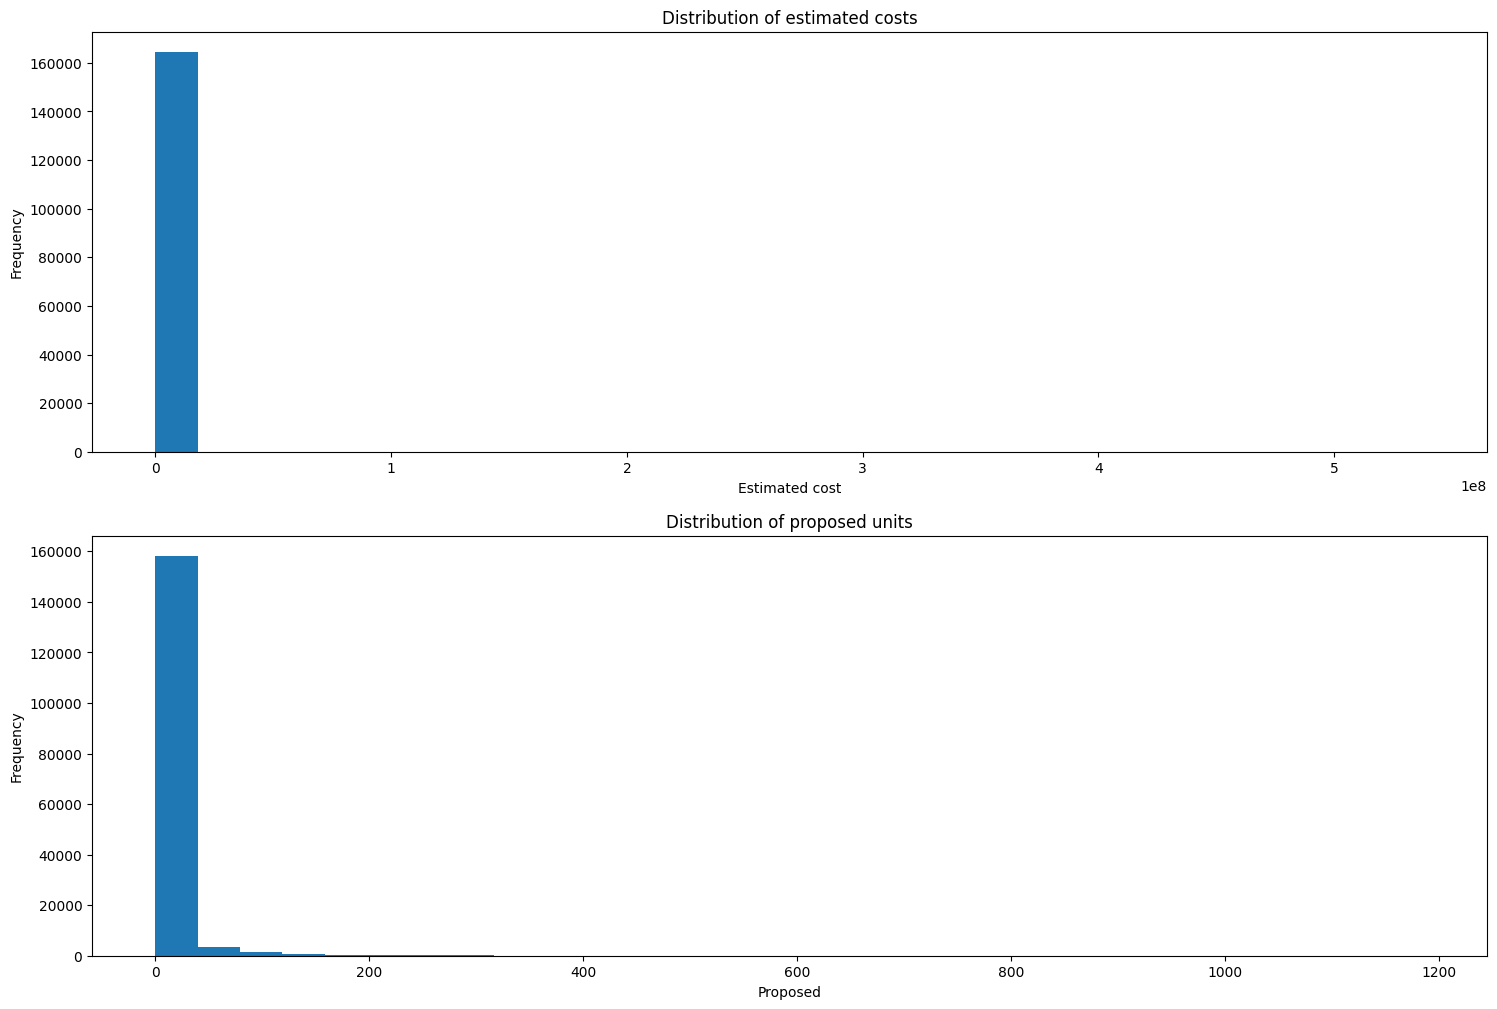

In [22]:
fig, axes = plt.subplots(2, 1, figsize=(18,12))

axes[0].hist(df["Estimated Cost"], bins=30)
axes[0].set_title("Distribution of estimated costs")
axes[0].set_xlabel("Estimated cost")
axes[0].set_ylabel("Frequency")

axes[1].hist(df["Proposed Units"], bins=30)
axes[1].set_title("Distribution of proposed units")
axes[1].set_xlabel("Proposed")
axes[1].set_ylabel("Frequency")

### 2.3.2. Numerical data outliers:

In [24]:
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

In [25]:
outliers_cost = detect_outliers_iqr(df["Estimated Cost"])
outliers_units = detect_outliers_iqr(df["Proposed Units"])

In [26]:
outliers_cost_count = outliers_cost.count()
outliers_units_count = outliers_units.count()
total_obs = df.shape[0]

In [27]:
total_outliers = ((outliers_cost_count + outliers_units_count) / total_obs ) * 100
print(f"At worse case scenario, all outliers represent {total_outliers:.2f}% of the total observations.")

At worse case scenario, all outliers represent 18.35% of the total observations.


The outliers represent a too much siginificative amount of the total observations to be dropped.  
Instead, we decide to log the concerned features.  
Outliers will be compressed and the skewness will be reduced.  

### 2.3.3. Log outliers:

In [30]:
df["Estimated Cost"] = np.log1p(df["Estimated Cost"])
df["Proposed Units"] = np.log1p(df["Proposed Units"])

<function matplotlib.pyplot.show(close=None, block=None)>

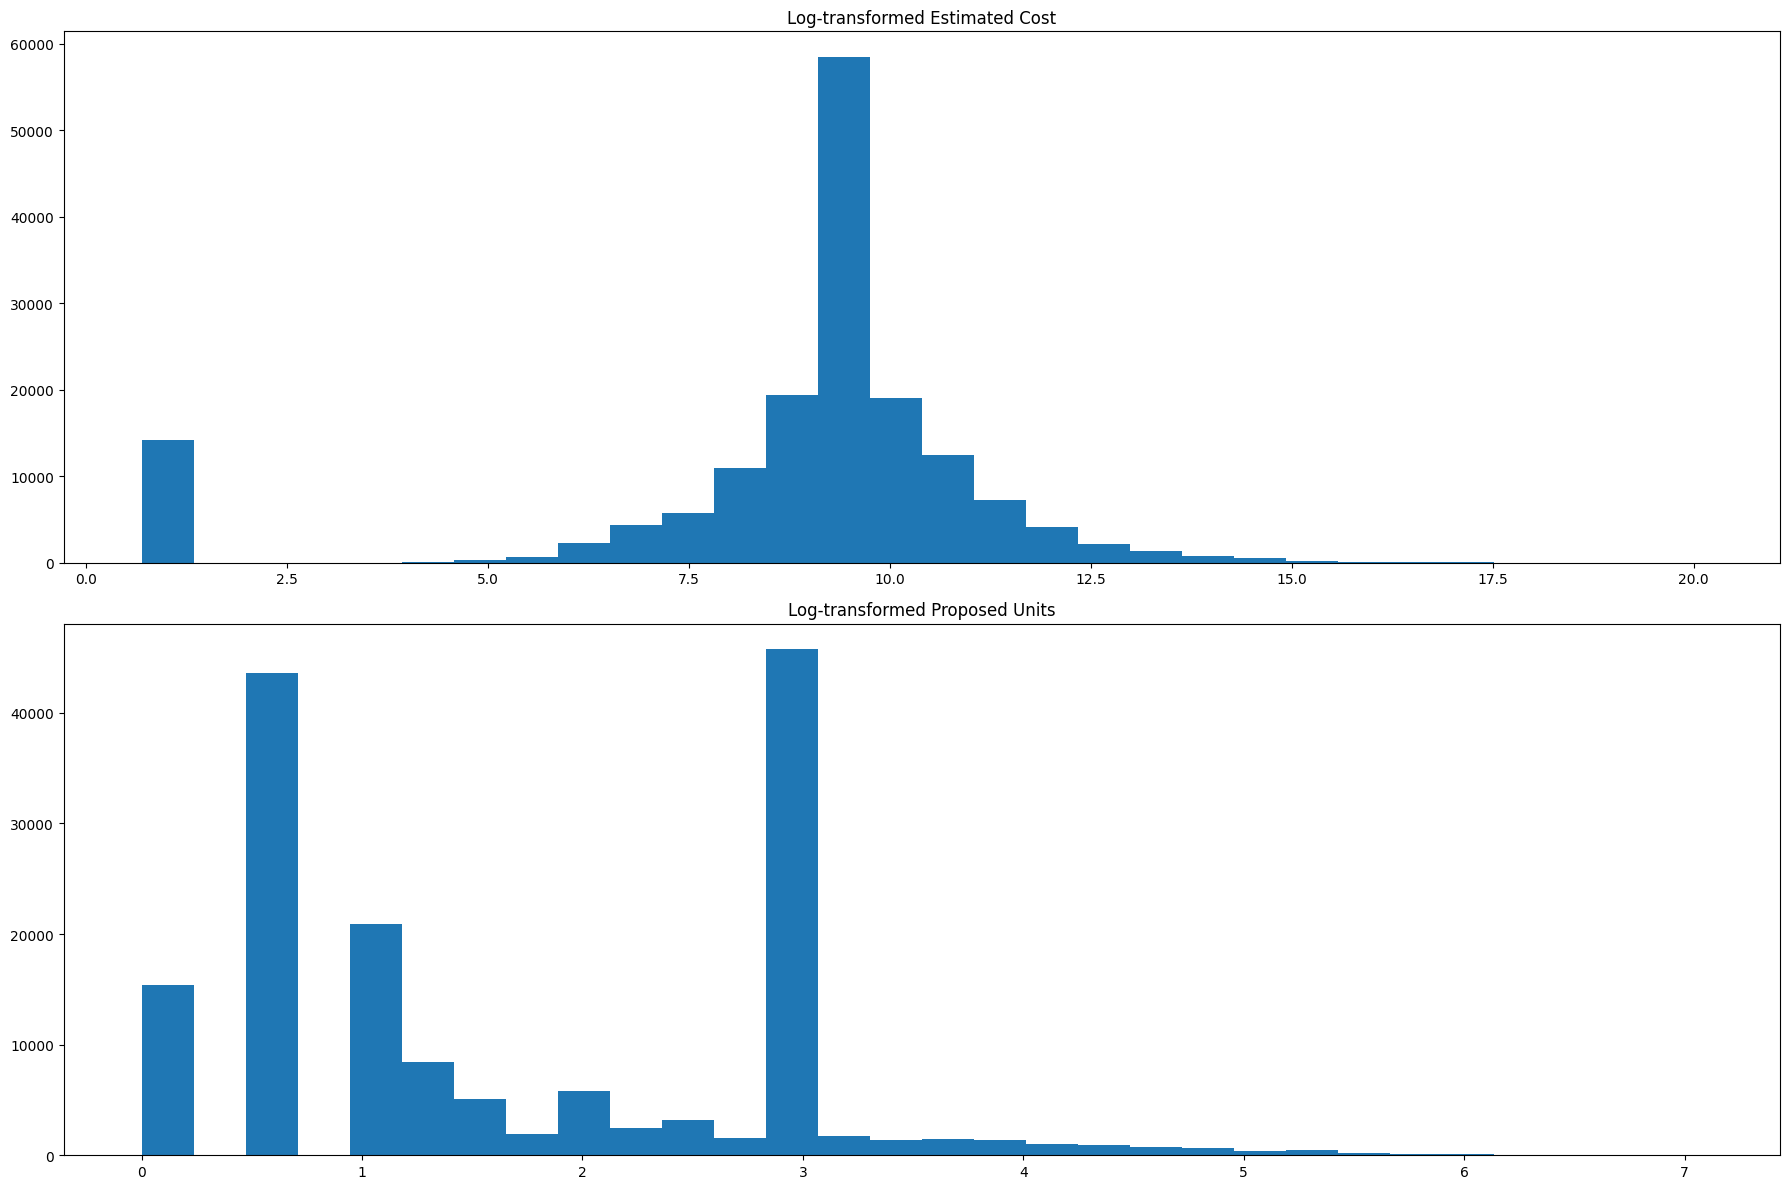

In [31]:
plt.figure(figsize=(18,12))

plt.subplot(2,1,1,)
plt.hist(df["Estimated Cost"], bins=30)
plt.title("Log-transformed Estimated Cost")

plt.subplot(2,1,2)
plt.hist(df["Proposed Units"], bins=30)
plt.title("Log-transformed Proposed Units")

plt.tight_layout()
plt.show

In [32]:
df[["Estimated Cost", "Proposed Units"]].head()

,Estimated Cost,Proposed Units
0,8.294300,2.833213
1,0.693147,2.833213
2,7.601402,0.693147
3,11.512935,2.833213
4,8.294300,5.789960


In [33]:
# df_file_path = r"..\data\raw\df_predictors03.csv"
# df.to_csv(df_file_path, index=False)

# 3. Target data check:

## 3.1. Target data distribution:

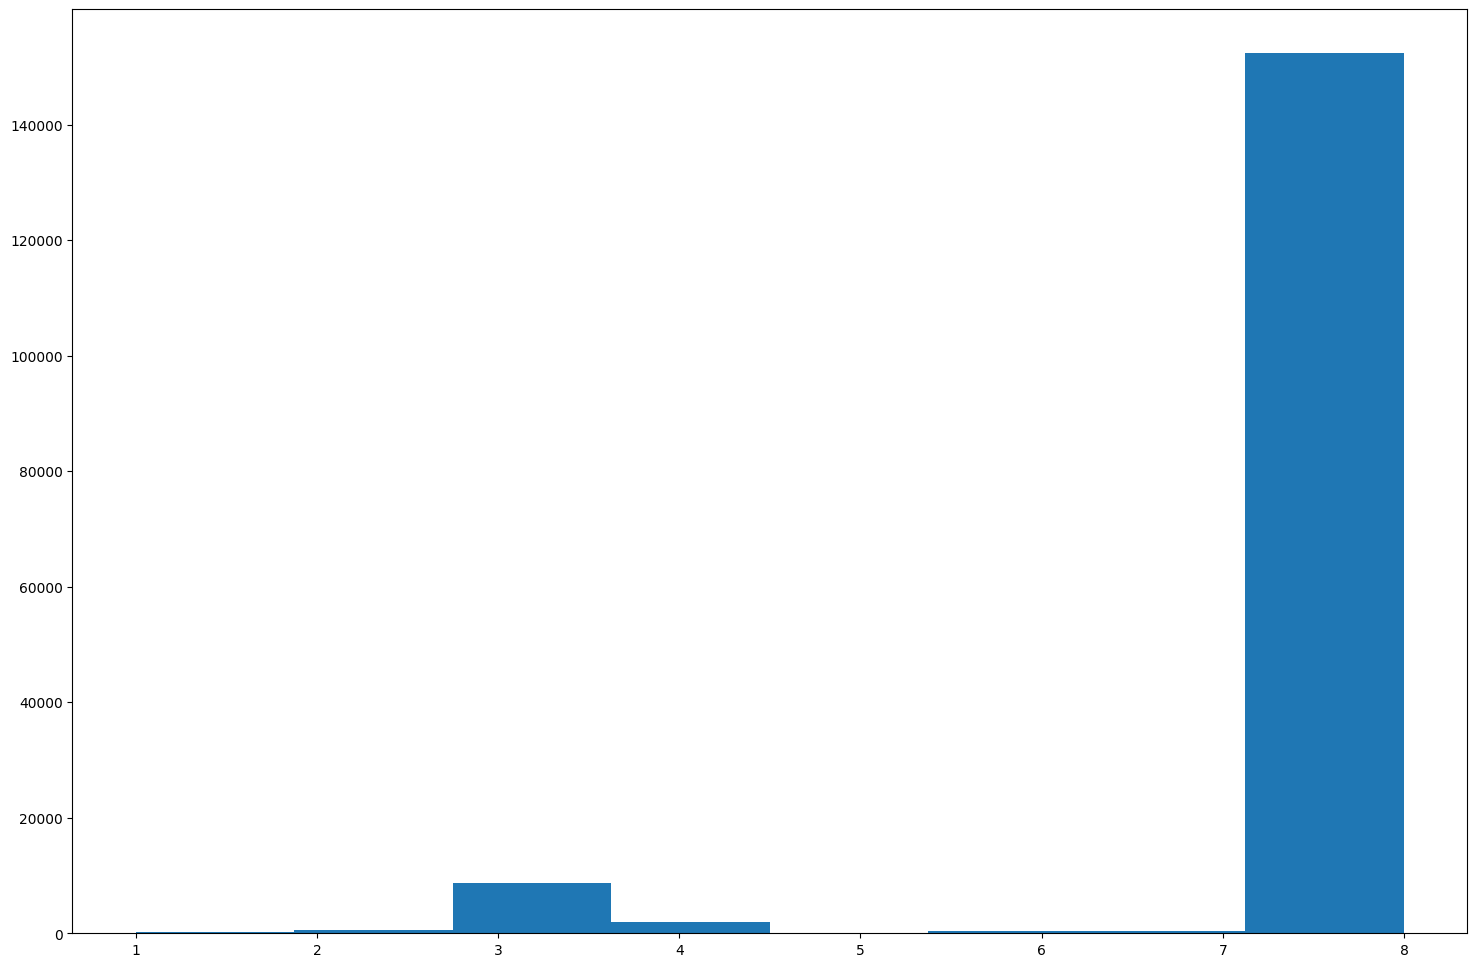

In [36]:
permit_type_count = len(list(target["Permit Type"].unique()))
permit_type_count

plt.figure(figsize=(18,12))
plt.hist(target["Permit Type"], bins=permit_type_count)

plt.savefig(r"..\reports\datapreprocessing_target_imbalance.png", dpi=300, bbox_inches='tight')

plt.show()

**The distribution of the dependent variable shows a clear imbalance between the 8 categories (classes) of Permit Type.**

## 3.2. Class imbalance management:

To handle the **class imbalance** in the target variable while ensuring that our model evaluation remains valid:

- **First**, we perform a **train/test split**, using the `stratify=y` argument to maintain class proportions in both sets.
- **Second**, we apply **SMOTE** (*Synthetic Minority Over-sampling Technique*) **only to the training set**.  
  This prevents any information from the test set from influencing the oversampling process, which would otherwise introduce **data leakage**.
- The **test set is left untouched**, preserving the original class imbalance so thet our model is evaluated under **real-world conditions**.

# 4. Categorical data handling:

- **Regression models** (e.g., linear or logistic regression) are **favored by one-hot encoding**, such as using `pd.get_dummies()`.  
  This avoids introducing any false ordinal relationships between categories.

- **Tree-based models** (e.g., Decision Trees, Random Forests, XGBoost, LightGBM):
  - Can **natively handle categorical features** in some implementations (e.g., LightGBM, CatBoost).
  - Or they can benefit from **integer encoding** (e.g., label encoding), especially when categories are not too numerous.
  - For **high-cardinality features**, **hash encoding** or **target encoding** may also be beneficial.

## 4.1. Regression models:

In [43]:
categories

['Proposed Use',
 'Neighborhoods - Analysis Boundaries',
 'Supervisor District',
 'Number of Existing Stories',
 'Proposed Construction Type',
 'Plansets']

**To avoid data leakage**, the best workflow is to:  
    - FIRST: split the data.  
    - SECOND: apply one-hot encoding on X_train and separately on X_test.  
    - TRHEE: sue `DataFRame.align()` to match their columns.  

## 4.2. Tree models:

In [46]:
df[categories].nunique()

Proposed Use                           94
Neighborhoods - Analysis Boundaries    41
Supervisor District                    11
Number of Existing Stories             13
Proposed Construction Type              5
Plansets                                6
dtype: int64

The features: "Proposed Use" and "Neighborhoods - Analysis Boundaries" show a high cardinality.  
This may justify the use of **target encoding**.  
However, to **avoid data leakage**, target encoding must only be applied on the training set.  

# 5. Workflow explanation:

The main concern is to avoid **data leakage**.  
Avoiding data leakage is crucial because data leakage leads to overly optimistic model performance during training, which fails completely when the model is deployed in the real world.  

With that concern in mind and for a workflow summary:  
    - FIRST: we split the data.  
    - SECOND: we apply SMOTE on the training set, only on the training data.  
    - THREE: **for tree-based models**, we use Target Encoding on the categorical features, fitting only on the resampled data.    
    - FOUR: **for regression-based models**, we use one-hot encoding and align.  
    - FIVE: we scale only the regression-based dataset.  

# 6. Data split:

In [52]:
X=df
y=target["Permit Type"]

In [53]:
len(X) == len(y)

True

In [54]:
X.index.equals(y.index)

True

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 7. Target class imbalance:

We encountered compatibility issues when attempting to install the `imblearn` package required for **SMOTE** (Synthetic Minority Oversampling Technique).

Therefore, as a reliable and cleaner alternative:

- We **first** handle class imbalance during data splitting by using the `stratify=y` argument in `train_test_split` to preserve class proportions.
- We **then** rely on the `class_weight` argument of the ML models to account for class imbalance during training.

This avoids the risk of **data leakage**, ensures **compatibility** with our current environment, and simplifies the overall pipeline. 
                                                               

# 8. Tree-based models and target encoding:

In [59]:
tree_encoder = TargetEncoder(cols=categories)
X_train_tree = tree_encoder.fit_transform(X_train, y_train)
X_test_tree = tree_encoder.transform(X_test)

# 9. Regression-based models, one-hot encoding and align:

In [61]:
X_train_reg = pd.get_dummies(X_train, drop_first=True)
X_test_reg = pd.get_dummies(X_test, drop_first=True)

In [62]:
X_train_reg, X_test_reg = X_train_reg.align(X_test_reg, join='left', axis=1, fill_value=0)

# 10. Data scaling:

In [64]:
scaler = StandardScaler()
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

# 11. Finaloutputs:

In [66]:
# For tree-based models (target encoded)
X_train_tree_final = X_train_tree
X_test_tree_final = X_test_tree
y_train_tree_final = y_train
y_test_tree_final = y_test

# For regression-based models (one-hot + scaled)
X_train_reg_final = X_train_reg_scaled
X_test_reg_final = X_test_reg_scaled
y_train_reg_final = y_train
y_test_reg_final = y_test

# 12. Datasets save:

In [68]:
base_path = r"..\data\processed"
zip_path = os.path.join(base_path, "preprocessed_datasets.zip")

# Dictionary of filenames and DataFrames/Series
datasets = {
    "X_train_tree_final.csv": X_train_tree_final,
    "X_test_tree_final.csv": X_test_tree_final,
    "y_train_tree_final.csv": y_train_tree_final,
    "y_test_tree_final.csv": y_test_tree_final,
    "X_train_reg_final.csv": pd.DataFrame(X_train_reg_final),
    "X_test_reg_final.csv": pd.DataFrame(X_test_reg_final),
    "y_train_reg_final.csv": pd.Series(y_train_reg_final),
    "y_test_reg_final.csv": pd.Series(y_test_reg_final)
}

# Create ZIP directly without saving individual files
with zipfile.ZipFile(zip_path, 'w', compression=zipfile.ZIP_DEFLATED) as zipf:
    for filename, df in datasets.items():
        with io.StringIO() as buffer:
            df.to_csv(buffer, index=False)
            zipf.writestr(filename, buffer.getvalue())